In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR

In [41]:
#Загрузка нормализованного датасета
dataset_norm=pd.read_excel('General_sel.xlsx')
dataset_norm.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset_norm.head(10)
dataset_norm.shape

(999, 13)

In [42]:
#Разбиение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test= train_test_split(dataset_norm.loc[:, dataset_norm.columns != 'Модуль упругости при растяжении, ГПа'],
 dataset_norm[['Модуль упругости при растяжении, ГПа']],
 test_size = 0.3,
 random_state = 42)

In [43]:
x_train

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа","Прочность при растяжении, МПа"
728,4.660319,1987.700316,139.342427,19.151985,304.039184,829.254993,197.398991,90,10.285612,61.662903,629.189776,2576.325922
630,3.073297,1920.881890,130.163998,24.235156,319.182157,239.535319,181.319236,90,3.851420,53.582761,783.077060,2697.698968
394,3.940619,1964.780616,84.337635,20.057061,262.470548,334.700978,255.304191,0,6.904562,58.523247,443.924976,2174.615390
777,2.643958,1927.758805,150.358605,26.110731,271.489290,354.681893,224.099800,90,2.042772,64.517457,797.667502,2462.709683
598,2.547478,1923.762595,130.656142,21.845865,328.386305,611.326829,251.450925,90,6.374020,56.332103,597.141517,3495.239969
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.490162,1986.340110,93.748554,24.593272,338.101359,76.682693,261.819468,0,3.708515,78.380006,1257.779003,2605.949634
270,4.434429,2061.918771,81.071393,23.213218,244.874100,934.780246,178.066150,0,2.788476,11.740126,328.876626,2995.952606
860,4.864317,1924.112827,98.444676,23.418492,301.941401,132.354841,130.658215,90,7.259854,62.728466,915.469142,2152.127763
435,3.501415,2037.052469,109.701267,22.881159,261.351487,828.061175,205.540520,0,7.539173,52.246884,746.020626,2475.114083


In [44]:
y_train

,"Модуль упругости при растяжении, ГПа"
728,71.744963
630,73.151894
394,78.071651
777,70.594461
598,78.149231
...,...
106,76.179383
270,76.238258
860,69.612618
435,73.528438


In [45]:
x_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа","Прочность при растяжении, МПа"
453,2.870544,2087.293217,80.430240,23.476372,205.286821,500.887933,230.792998,0,5.897057,88.807647,257.935595,2759.752788
793,3.649739,1976.146239,157.541400,22.736201,307.650734,432.251636,204.844970,90,6.511228,68.664498,712.379573,2668.738929
209,2.509977,1912.215145,87.198840,21.883152,252.331069,781.355358,206.428712,0,0.145034,54.138756,1056.096385,2029.147825
309,3.113267,2020.309903,129.578767,20.798849,306.088190,777.962700,290.986464,0,5.364139,54.581442,383.006898,2160.777729
740,3.460576,2070.530524,76.858347,24.209401,268.288453,716.274381,205.546133,90,5.376332,52.977356,148.258590,2039.609992
...,...,...,...,...,...,...,...,...,...,...,...,...
314,2.223337,1929.584696,123.687384,20.520041,292.678638,469.436557,216.479290,0,9.511737,58.196301,444.184402,1908.203759
404,3.065947,2020.828331,88.688127,24.802379,292.716588,636.836532,205.620277,0,5.315338,56.004141,924.667791,1799.493329
7,2.561475,1900.000000,111.860000,22.267857,284.615385,380.000000,120.000000,0,7.000000,47.000000,535.000000,1800.000000
155,2.314541,2005.151555,81.793370,25.179894,265.652005,219.876245,239.280576,0,0.390191,51.570139,905.473601,2053.646797


In [46]:
y_test

,"Модуль упругости при растяжении, ГПа"
453,73.015274
793,73.423258
209,71.555460
309,69.864261
740,70.364622
...,...
314,71.090775
404,69.492433
7,75.000000
155,74.925555


In [55]:
# Метод опорных векторов
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
svr.fit(x_train, np.ravel(y_train))
y_pred_train=svr.predict(x_train)
y_pred_test=svr.predict(x_test)
det_train=svr.score(x_train, y_train)
det_test=svr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.9066231820012703
MAE_train: 0.9164718381581224
Test score: -0.6527717193654883
MAE_test: 3.07439639808873


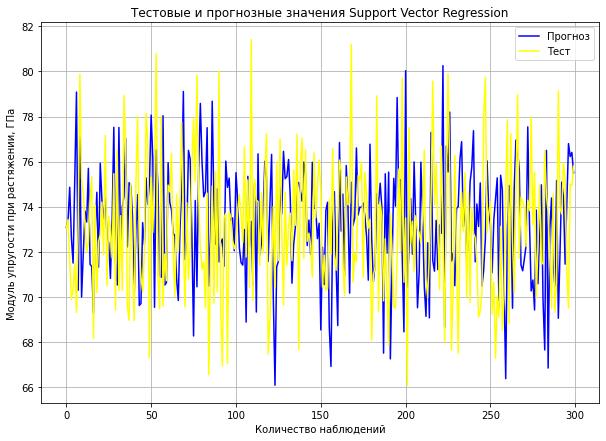

In [56]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = "yellow")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [49]:
#метод случайный лес
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(x_train, np.ravel(y_train.values))
y_pred_train=rfr.predict(x_train)
y_pred_test=rfr.predict(x_test)
det_train=rfr.score(x_train, y_train)
det_test=rfr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.4225511090459959
MAE_train: 1.9075680066494052
Test score: -0.05391306818837904
MAE_test: 2.4254196920663573


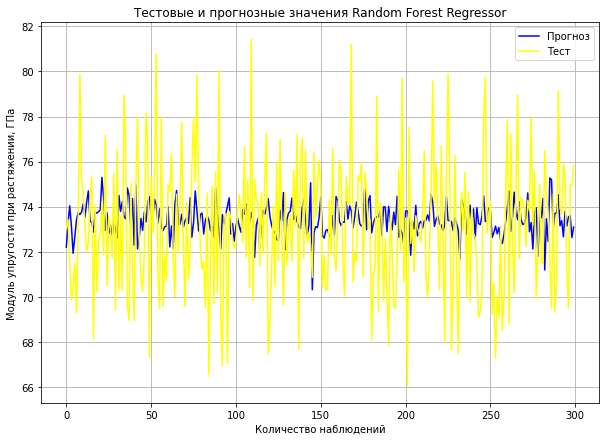

In [50]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [51]:
#модель множественной линейной регрессии
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred_train=mlr.predict(x_train)
y_pred_test=mlr.predict(x_test)
det_train=mlr.score(x_train, y_train)
det_test=mlr.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.012480252719660245
MAE_train: 2.482783083891976
Test score: -0.023098491390781684
MAE_test: 2.411196826722593


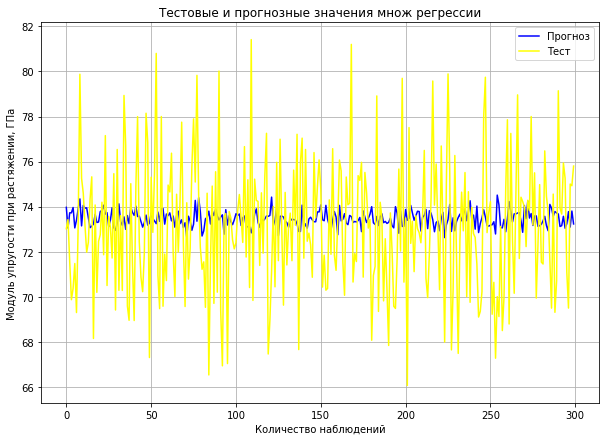

In [52]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения множ регрессии")
plt.plot(y_pred_test, label = "Прогноз", color = "blue")
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [53]:
#модель К ближайших соседей 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
det_train=knn.score(x_train, y_train)
det_test=knn.score(x_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
print("Train score:",det_train) 
print('MAE_train:', mae_train)
print("Test score:",det_test)
print('MAE_test:', mae_test)

Train score: 0.21811022135895086
MAE_train: 2.1616090784039943
Test score: -0.2095913619695886
MAE_test: 2.5962809870675474


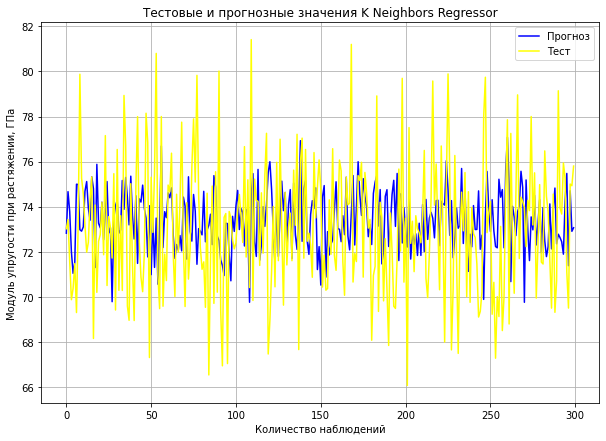

In [54]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_test, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'yellow')
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);